# **Vorbereitung**

In [1]:
# Import der Python Pakete
import os
#import progressbar
#from google.colab import drive
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# import matplotlib.pyplot as plt
# from __future__ import print_function, division
# import os
# import numpy as np
# import glob
# import torch
# from torchvision.utils import make_grid
# import torch.nn as nn # for definition of network
# import torch.optim as optim # for optimizazion of network
# import torch.nn.functional as F # for loss function
# from torch.utils.data import DataLoader # for loading data
# from torch.autograd import Variable
# from torchvision import datasets, transforms
# import torchvision.models as models
# from torch.utils.data import random_split
# import time
# import copy
# import shutil
# import random

In [3]:
## Verbindung mit Google Drive herstellen um die Bilder zu laden
#drive.mount('/content/gdrive', force_remount=True)  # use force_remount=True param after upload of new data

In [4]:
## Auswahl des Ordners, in welchem die Bilder liegen
#%cd gdrive/MyDrive/Pixel-Power/Bilder/

# **Ein paar Basics**

### Ein Bild besteht gewöhnlich aus 3 Ebenen:  <font color='red'>Rot</font> - <font color='green'>Grün</font> - <font color='blue'>Blau</font>

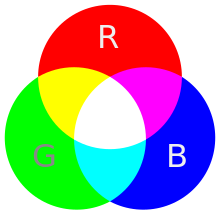



### Man kann Farben am Computer wiedergeben, indem man angibt, wie viel <font color='red'>rot</font>, <font color='green'>grün</font> und <font color='blue'>blau</font> sie enthalten sollen.


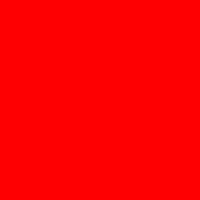

In [2]:
# Rot, Grün und Blau sind einfach zu erzeugen -> Rot
farbe_rot = Image.new('RGB',(200,200),(255,0,0))
display(farbe_rot)

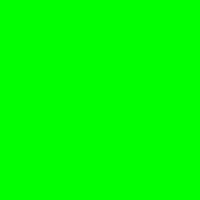

In [3]:
# Rot, Grün und Blau sind einfach zu erzeugen -> Grün
farbe_grün = Image.new('RGB',(200,200),(0,255,0))
display(farbe_grün)

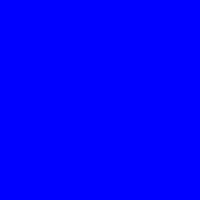

In [4]:
# Rot, Grün und Blau sind einfach zu erzeugen -> Blau
farbe_blau = Image.new('RGB',(200,200),(0,0,255))
display(farbe_blau)

Schwarz:


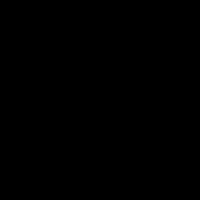

Weiß:


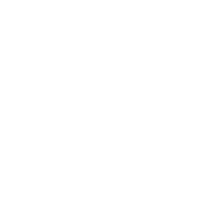

Lila:


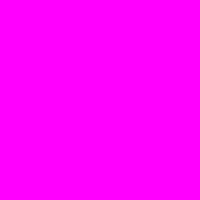

Grün:


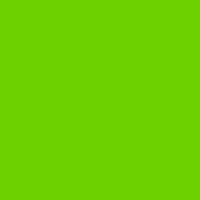

In [8]:
# Beispiel für andere Farben
print("Schwarz:")
farbe_schwarz = Image.new('RGB',(200,200),(0,0,0)) # keine Farben
display(farbe_schwarz)

print("Weiß:")
farbe_weiß = Image.new('RGB',(200,200),(255,255,255)) # alle Farben
display(farbe_weiß)

print("Lila:")
farbe_lila = Image.new('RGB',(200,200),(255,0,255)) # Rot und Blau
display(farbe_lila)

print("Grün:")
farbe_grün = Image.new('RGB',(200,200),(109,209,0)) # Grün mit Rot
display(farbe_grün)


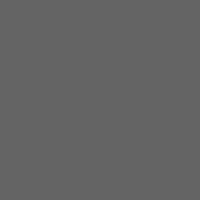

In [9]:
# Probiere aus, wie welche Farben gemischt werden können.
farb_experiment = Image.new('RGB',(200,200),(100,100,100)) 
display(farb_experiment)

# **Und jetzt geht's los**

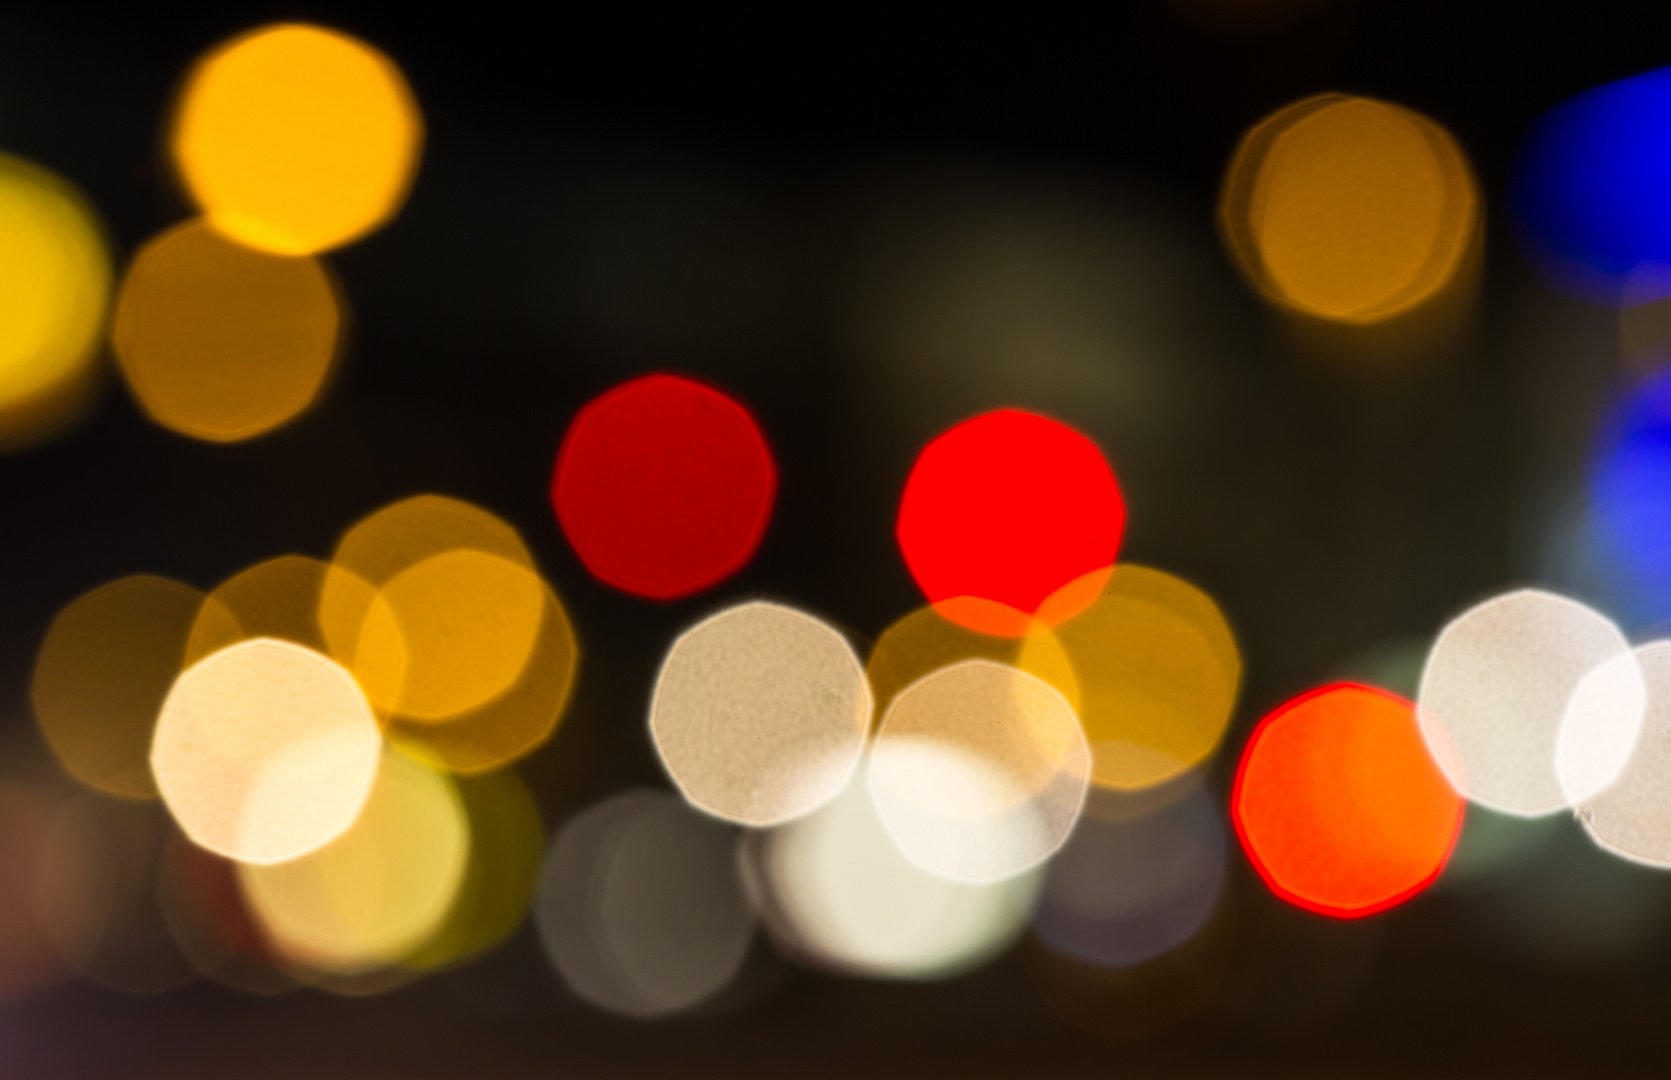

In [11]:
# Auswahl und Anzeigen des Bilds (Quelle: https://www.fotocommunity.de/photo/lichtpunkte-kmikka/33475018)
beispiel_1 = Image.open('Bilder/Beispiel.jpg')
display(beispiel_1)

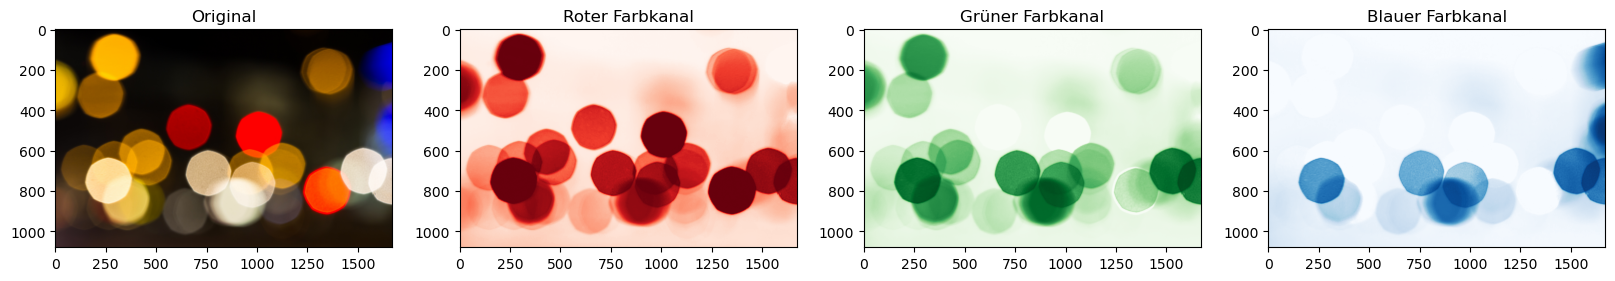

In [12]:
# Aufsplittung des Bildes in die 3 Ebenen
M = np.asarray(beispiel_1)

plt.figure(figsize=(20, 6))

plt.subplot(141)
plt.imshow(M[:, :, :], vmin=0, vmax=255)
plt.title("Original")

plt.subplot(142)
plt.imshow(M[:, :, 0], cmap='Reds', vmin=0, vmax=255)
plt.title("Roter Farbkanal")

plt.subplot(143)
plt.imshow(M[:, :, 1], cmap='Greens', vmin=0, vmax=255)
plt.title("Grüner Farbkanal")

plt.subplot(144)
plt.imshow(M[:, :, 2], cmap='Blues', vmin=0, vmax=255)
plt.title("Blauer Farbkanal")

plt.show()

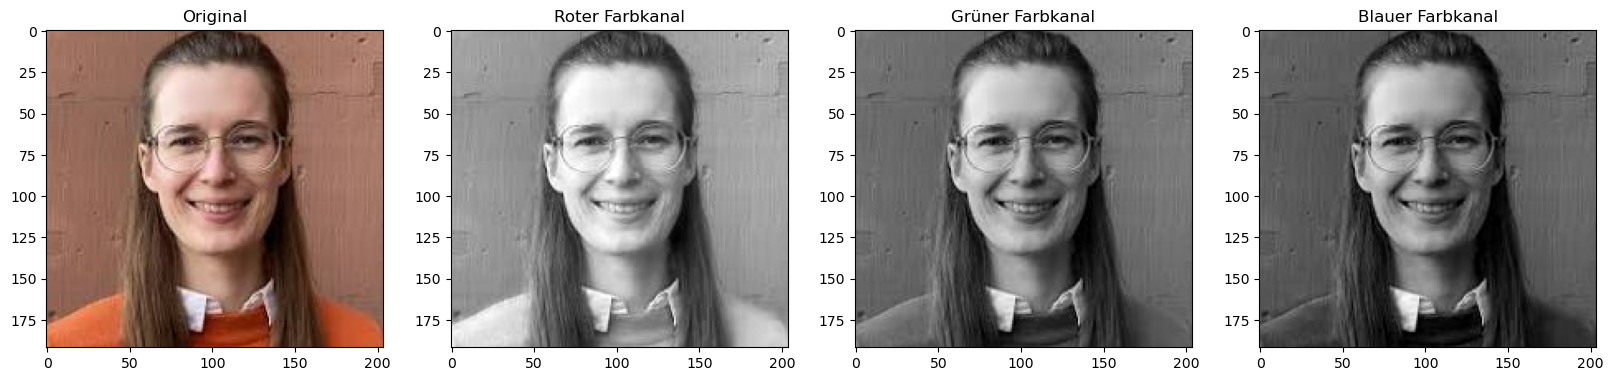

In [13]:
# Bild anzeigen

beispiel_k = Image.open('Bilder/Katharina.jpeg')

original_bild = np.asarray(beispiel_k)

plt.figure(figsize=(20, 6))

plt.subplot(141)
plt.imshow(original_bild[:, :, :], vmin=0, vmax=255)
plt.title("Original")

plt.subplot(142)
plt.imshow(original_bild[:, :, 0], cmap="gray", vmin=0, vmax=255)
plt.title("Roter Farbkanal")

plt.subplot(143)
plt.imshow(original_bild[:, :, 1],cmap="gray", vmin=0, vmax=255)
plt.title("Grüner Farbkanal")

plt.subplot(144)
plt.imshow(original_bild[:, :, 2],cmap="gray", vmin=0, vmax=255)
plt.title("Blauer Farbkanal")

plt.show()

[197  85  47]


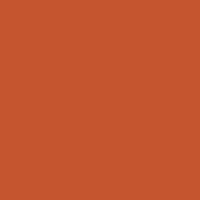

In [43]:
# Man kann auch für einzelne Pixel anschauen, welche Farbe sie haben
pixel_farbe = original_bild[180,180]
print(pixel_farbe)
display(Image.new('RGB',(200,200), tuple(pixel_farbe)))

[240 131  88]


Text(0.5, 1.0, 'Verändertes Bild')

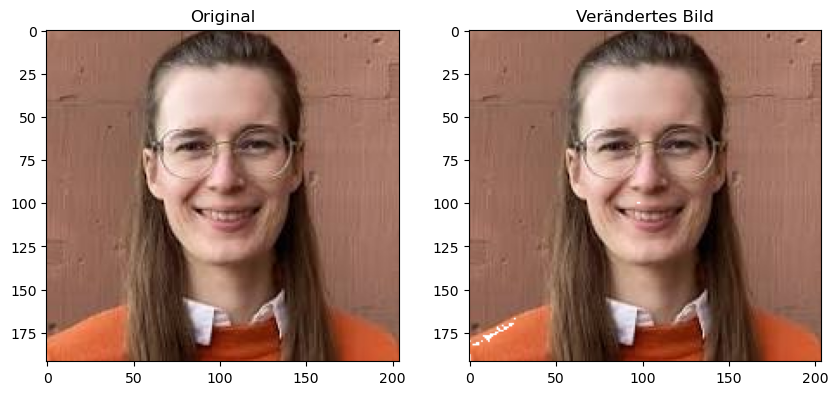

In [44]:
# Man kann Farben durch andere austauschen

# Wähle aus, welche Farbe du austauschen möchtest anhand eines Pixels
pixel_farbe = original_bild[180,11]
print(pixel_farbe)
Reihen, Spalten, Farbkanäle = original_bild.shape
verändertes_bild = original_bild.copy()


for i in range(0,Reihen):
    for j in range(0,Spalten):
        delta = np.asarray(original_bild[i,j]) - np.asarray(pixel_farbe)
        if np.sum(delta) < 150:
            verändertes_bild[i,j] = [255,255,255]; # RGB
        else:  verändertes_bild[i,j] = original_bild[i,j]
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(original_bild[:, :, :], vmin=0, vmax=255)
plt.title("Original")

plt.subplot(122)
plt.imshow(verändertes_bild[:, :, :], vmin=0, vmax=255)
plt.title("Verändertes Bild")

[240 131  88]
(192, 204, 3) (192, 204)


Text(0.5, 1.0, 'Graues Bild')

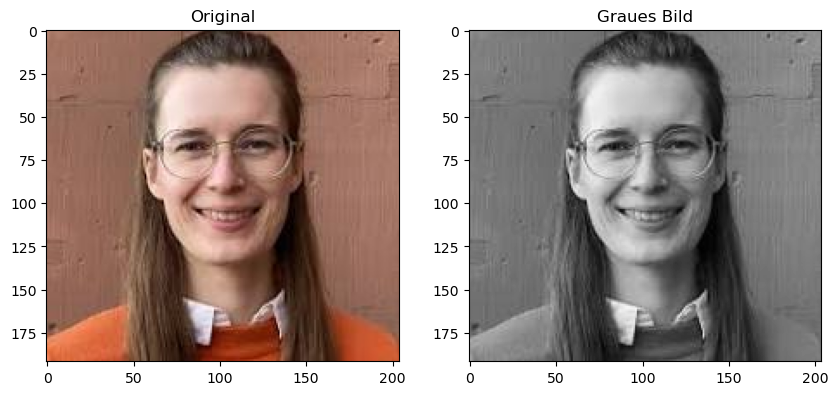

In [61]:
# Man kann farbige Bilder auch in graue Bilder umwandeln (Formal: Graues Bild = 0.299 ∙ Rot + 0.587 ∙ Grün + 0.114 ∙ Blau )

# Wähle aus, welche Farbe du austauschen möchtest anhand eines Pixels
pixel_farbe = original_bild[180,11]
print(pixel_farbe)
Reihen, Spalten, Farbkanäle = original_bild.shape


graues_bild = 0.299 * original_bild[:,:,0] + 0.587 * original_bild[:,:,1] + 0.114 * original_bild[:,:,2] 

print(original_bild.shape, graues_bild.shape)

plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(original_bild, vmin=0, vmax=255)
plt.title("Original")

plt.subplot(122)
plt.imshow(graues_bild, cmap="gray", vmin=0, vmax=255)
plt.title("Graues Bild")

# Bild Filter

Text(0.5, 1.0, 'Bild mit Box Blur Filter')

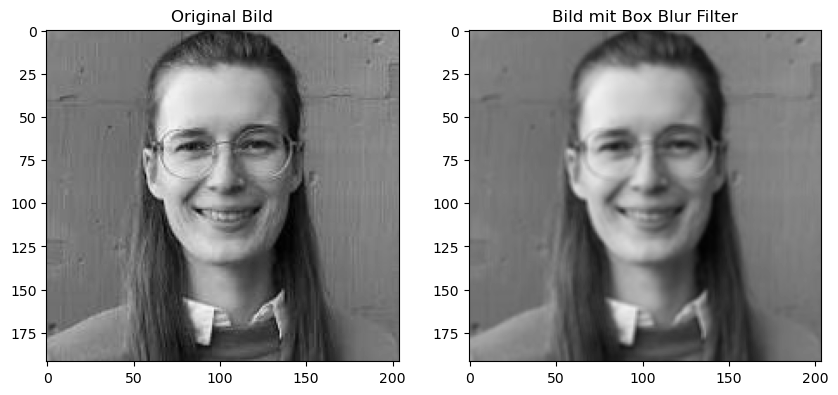

In [63]:
# Definiere den Filter
box_blur = np.array([[1, 1, 1], 
                     [1, 1, 1], 
                     [1, 1, 1]]) * 1/9

# Wende den Filter auf das Bild an
ergebnis_box_blur = cv2.filter2D(graues_bild, -1, box_blur)

# Schaue dir die Ergebnisse an
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(graues_bild, cmap="gray", vmin=0, vmax=255)
plt.title("Original Bild")

plt.subplot(122)
plt.imshow(ergebnis_box_blur, cmap="gray", vmin=0, vmax=255)
plt.title("Bild mit Box Blur Filter")

Text(0.5, 1.0, 'Bild mit Sharpening Filter')

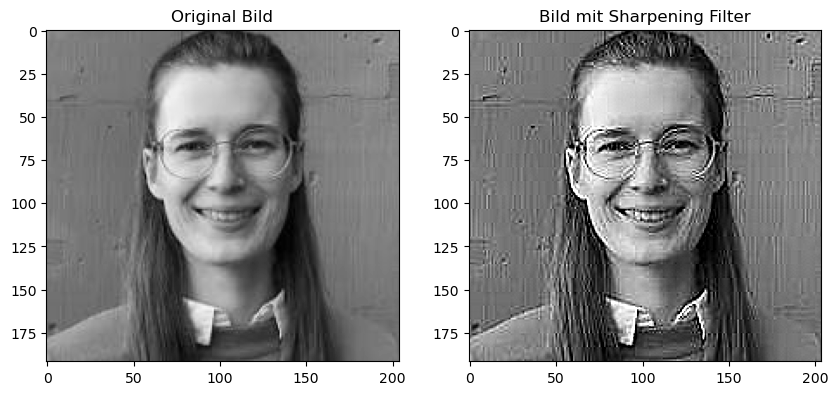

In [64]:
# Definiere den Filter
sharpening = np.array([[0, -1, 0], 
                     [-1, 5, -1], 
                     [0, -1, 0]]) 

# Wende den Filter auf das Bild an
ergebnis_sharpening = cv2.filter2D(graues_bild, -1, sharpening)

# Schaue dir die Ergebnisse an
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(graues_bild, cmap="gray", vmin=0, vmax=255)
plt.title("Original Bild")

plt.subplot(122)
plt.imshow(ergebnis_sharpening, cmap="gray", vmin=0, vmax=255)
plt.title("Bild mit Sharpening Filter")